In [1]:
#importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

## Data Understanding

In [2]:
# Reading the data
ls_df = pd.read_csv('Leads.csv')
ls_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Dropping Prospect ID as it doesnt make any sense
ls_df.drop(['Prospect ID'], inplace = True, axis=1)
ls_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
ls_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
ls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [6]:
ls_df.shape

(9240, 36)

## Missing values

In [7]:
#Checking the percentage of missing values

round(100*(ls_df.isnull().sum()/len(ls_df)),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

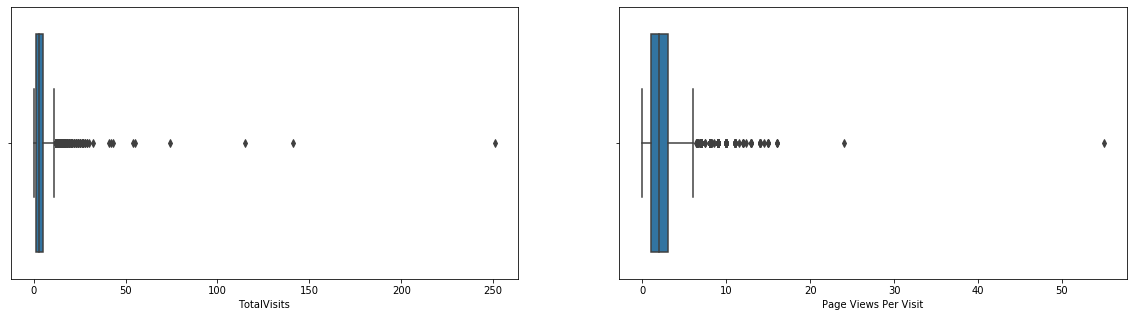

In [8]:
#Seeing the outlier distribution and deciding weather to impute mean or median
plt.figure(figsize = (20,5))

box = ['TotalVisits','Page Views Per Visit',]

for i in enumerate(box):
    plt.subplot(1,2,i[0]+1)
    sns.boxplot(x = i[1], data = ls_df)

- Looking at this we can say that its good to impute the missing values with median 

In [9]:
#Imputing median in Total visit and page views per visit

ls_df['TotalVisits'].fillna(ls_df['TotalVisits'].median(), inplace = True)
ls_df['Page Views Per Visit'].fillna(ls_df['Page Views Per Visit'].median(), inplace = True)

In [10]:
# Dropping values which are more than 40 %percentage

ls_df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Profile Score','Asymmetrique Activity Score','Lead Quality'], inplace = True, axis=1)

In [11]:
# We can notice in the lead score that there are quite few mistakes in the naming
ls_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
blog                    1
NC_EDM                  1
youtubechannel          1
Pay per Click Ads       1
testone                 1
WeLearn                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [12]:
# Correcting spelling errors
# Imputing some single values into different categorie called Advertisement

ls_df['Lead Source'] = ls_df['Lead Source'].replace('google','Google')
ls_df['Lead Source'] = ls_df['Lead Source'].replace('Welingak Website','Welingkar')
ls_df['Lead Source'] = ls_df['Lead Source'].replace({'Click2call': 'Advertisement','Press_Release': 'Advertisement',
                'Pay per Click Ads': 'Advertisement','welearnblog_Home': 'Advertisement','youtubechannel': 'Advertisement',
                 'testone': 'Advertisement', 'NC_EDM': 'Advertisement','WeLearn': 'Advertisement','blog': 'Advertisement'})

In [13]:
ls_df['Lead Source'].value_counts()

Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Welingkar          142
Referral Sites     125
Facebook            55
Advertisement       13
bing                 6
Live Chat            2
Social Media         2
Name: Lead Source, dtype: int64

Text(0, 0.5, 'Frequency')

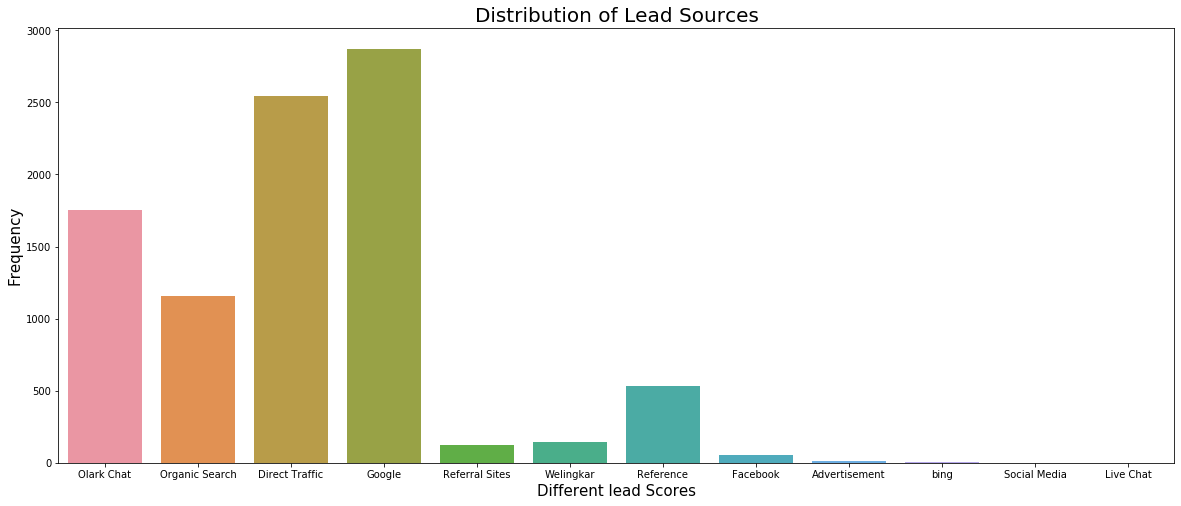

In [14]:
plt.figure(figsize=(20,8))
sns.countplot(x= ls_df['Lead Source'])
plt.title('Distribution of Lead Sources',fontsize =20)
plt.xlabel('Different lead Scores',fontsize =15)
plt.ylabel('Frequency',fontsize =15)

In [15]:
ls_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [16]:
# Imputing missing values of lead score with Google(mode)

ls_df['Lead Source'].fillna('Google',inplace = True)

#Imputing missingvalues of last activity with Email Opened (mode)

ls_df['Last Activity'].fillna('Email Opened',inplace = True)

In [17]:
ls_df.shape

(9240, 31)

In [18]:
# Looking into major distibution of country
ls_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Germany                    4
South Africa               4
Kuwait                     4
Canada                     4
Sweden                     3
Philippines                2
Bangladesh                 2
Asia/Pacific Region        2
Ghana                      2
China                      2
Belgium                    2
Netherlands                2
Uganda                     2
Italy                      2
Switzerland                1
Denmark                    1
Russia                     1
Tanzania                   1
Kenya                      1
Vietnam                    1
Malaysia      

- Its good to drop the country column as we can see the data is actually skewed on one side
- Plus it has 26% of missing values
- Major value in the country colum is **India**
- There is not much varaince in the data

In [19]:
# Dropping country column

ls_df.drop('Country', inplace= True, axis = 1)

In [20]:
ls_df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

- Imputing anything would skew the data largely on one side so will drop the column

In [21]:
#Dropping  'How did you hear about X Education' column has there is lot of values with select and ~24% of missing values
# Imputing any value would largely skew the data


ls_df.drop('How did you hear about X Education', inplace= True, axis = 1)

In [22]:
ls_df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [23]:
# Replacing the Select valaue with Not filled and imputing the missing values with Notfilled

ls_df['Specialization'] = ls_df['Specialization'].replace('Select','Not Filled')
ls_df['Specialization'].fillna('Not Filled',inplace = True)

In [24]:
ls_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Text(0, 0.5, 'Frequency')

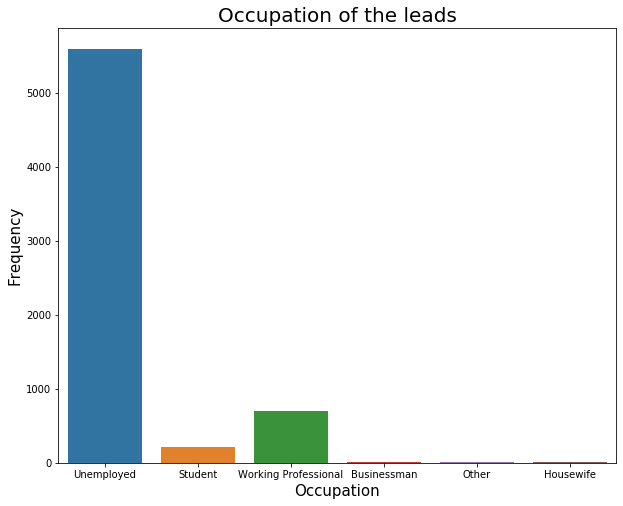

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(x= ls_df['What is your current occupation'])
plt.title('Occupation of the leads',fontsize =20)
plt.xlabel('Occupation',fontsize =15)
plt.ylabel('Frequency',fontsize =15)

In [26]:
#filling the missing values with unemployed

ls_df['What is your current occupation'].fillna('Unemployed', inplace = True)

In [27]:
ls_df['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [28]:
ls_df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [29]:
ls_df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [30]:
# Magizne, Search and X Education Forums is largely skewwed and will drop it

ls_df.drop(['X Education Forums','Magazine','Search'], inplace = True, axis =1)

In [31]:
#X Education Forums

ls_df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [32]:
# Deciding to drop 'Receive More Updates About Our Courses' as all the datapoints are No
ls_df.drop('Receive More Updates About Our Courses', inplace = True, axis = 1)

In [33]:
ls_df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [34]:
# Dropping Tag column as it as lot of missing values

ls_df.drop('Tags', inplace = True, axis = 1)

In [35]:
ls_df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [36]:
# Dropping 'Update me on Supply Chain Content' as it largely skewwed

ls_df.drop('Update me on Supply Chain Content', inplace = True, axis =1)

In [37]:
# Looking the value Get updates on DM Content
ls_df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [38]:
# Dropping ''Get updates on DM Content'' as it largely skewwed
ls_df.drop('Get updates on DM Content', inplace = True, axis =1)

In [39]:
ls_df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [40]:
ls_df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [41]:
# Deciding to drop lead profile and 'I agree to pay the amount through cheque' 
# In 'I agree to pay the amount through cheque' is largely skweewd and lead profile as large number of missing values and Select
# Column as many missing values

ls_df.drop(['Lead Profile','I agree to pay the amount through cheque'], inplace = True, axis =1)

In [42]:
ls_df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [43]:
ls_df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

Text(0, 0.5, 'Frequency')

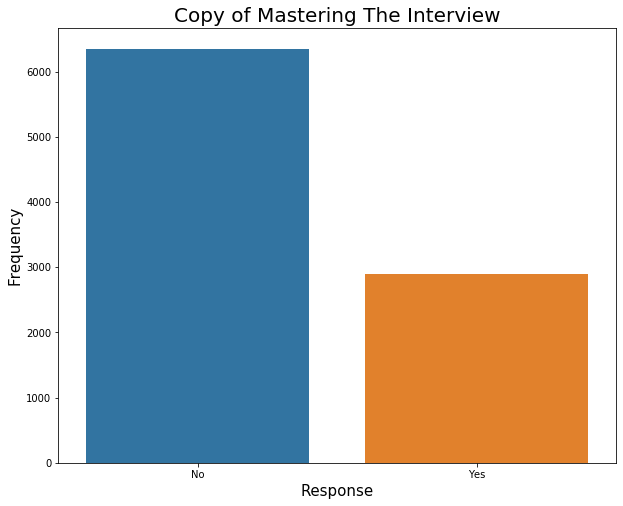

In [44]:
plt.figure(figsize=(10,8))
sns.countplot(x= ls_df['A free copy of Mastering The Interview'])
plt.title('Copy of Mastering The Interview',fontsize =20)
plt.xlabel('Response',fontsize =15)
plt.ylabel('Frequency',fontsize =15)

In [45]:
ls_df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [46]:
ls_df.shape

(9240, 20)

In [47]:
#Dropping the city column as the it majorly concentratred in Maharashtra region

ls_df.drop('City', inplace = True, axis = 1)

In [48]:
# We can see the data is largely skewed and as good percentage of missing values

ls_df['What matters most to you in choosing a course'].value_counts()


Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Text(0, 0.5, 'Frequency')

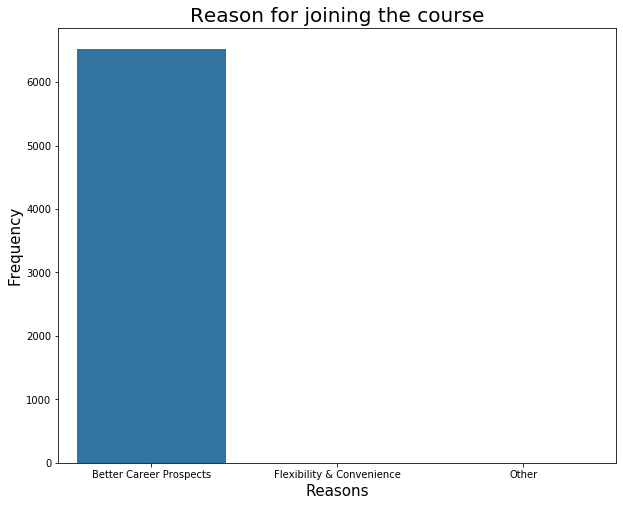

In [49]:
plt.figure(figsize=(10,8))
sns.countplot(x= ls_df['What matters most to you in choosing a course'])
plt.title('Reason for joining the course',fontsize =20)
plt.xlabel('Reasons',fontsize =15)
plt.ylabel('Frequency',fontsize =15)

In [50]:
#Dropping 'What matters most to you in choosing a course' as there is low variance and quite some missing values

ls_df.drop('What matters most to you in choosing a course', inplace = True, axis = 1)

In [51]:
#Checking the percentage of missing values
round(100*(ls_df.isnull().sum()/len(ls_df)),2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Newspaper Article                         0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [52]:
#Renaming the columns to smaller one
ls_df = ls_df.rename(columns = {'Do Not Email': 'No Email', 'Do Not Call':'No call','What is your current occupation':'Occupation',
                               'Total Time Spent on Website':'Time Spent','Page Views Per Visit':'Pages Viewed',
                               'A free copy of Mastering The Interview': 'Copy of Mastering Interview' })
ls_df.head()

,Lead Number,Lead Origin,Lead Source,No Email,No call,Converted,TotalVisits,Time Spent,Pages Viewed,Last Activity,Specialization,Occupation,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Copy of Mastering Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Filled,Unemployed,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Filled,Unemployed,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Filled,Unemployed,No,No,No,No,No,Modified


In [53]:
ls_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'No Email', 'No call',
       'Converted', 'TotalVisits', 'Time Spent', 'Pages Viewed',
       'Last Activity', 'Specialization', 'Occupation', 'Newspaper Article',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Copy of Mastering Interview', 'Last Notable Activity'],
      dtype='object')

In [54]:
ls_df.shape

(9240, 18)

## Outlier Analysis

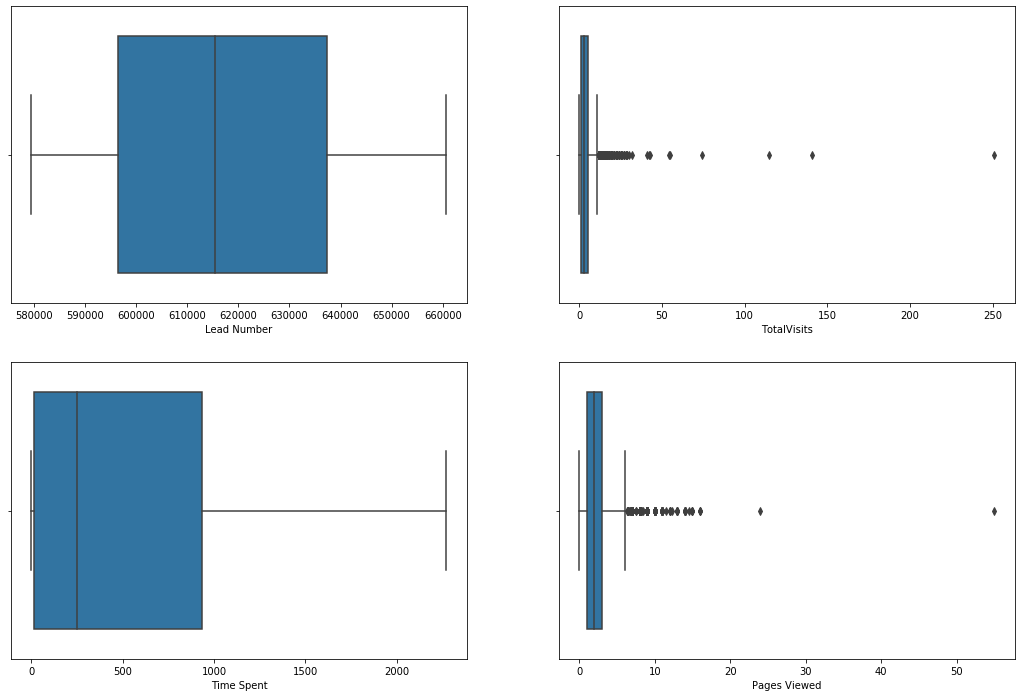

In [55]:
plt.figure(figsize = (18,12))

kappa = ['Lead Number','TotalVisits','Time Spent','Pages Viewed']

for i in enumerate(kappa):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x = i[1], data = ls_df)

In [56]:
# As we can see we need to perform outlier treatment for pages viewed and total visits

box = ['TotalVisits','Pages Viewed']

for i in box:
    q1 = ls_df[i].quantile(0.01)
    q4 = ls_df[i].quantile(0.99)
    ls_df = ls_df[(ls_df[i]>=q1) & (ls_df[i]<=q4)]

ls_df.shape

(9090, 18)

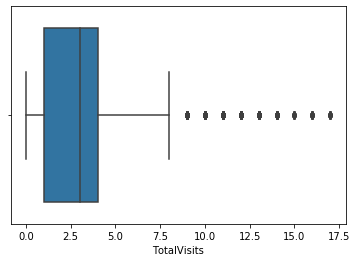

In [57]:
sns.boxplot(x = 'TotalVisits', data = ls_df)

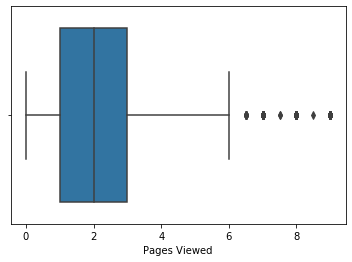

In [58]:
sns.boxplot(x = 'Pages Viewed', data = ls_df)

In [59]:
# Final dataset
pd.set_option('display.max_columns', None)
ls_df.reset_index(inplace = True, drop =True)
ls_df.head()

,Lead Number,Lead Origin,Lead Source,No Email,No call,Converted,TotalVisits,Time Spent,Pages Viewed,Last Activity,Specialization,Occupation,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Copy of Mastering Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Filled,Unemployed,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Filled,Unemployed,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Filled,Unemployed,No,No,No,No,No,Modified


In [60]:
ls_df.describe()

,Lead Number,Converted,TotalVisits,Time Spent,Pages Viewed
count,9090.000000,9090.000000,9090.000000,9090.000000,9090.000000
mean,617197.434763,0.384488,3.140924,484.243784,2.262836
std,23392.354280,0.486501,2.881884,547.243973,1.881164
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596502.500000,0.000000,1.000000,9.000000,1.000000
50%,615557.000000,0.000000,3.000000,246.000000,2.000000
75%,637360.750000,1.000000,4.000000,930.000000,3.000000
max,660737.000000,1.000000,17.000000,2272.000000,9.000000


# Data Preparation

In [61]:
# List of variables to map

varlist =  ['No Email', 'No call', 'Newspaper Article', 'Newspaper','Digital Advertisement',
           'Through Recommendations','Copy of Mastering Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
ls_df[varlist] = ls_df[varlist].apply(binary_map)

In [62]:
ls_df.head()

,Lead Number,Lead Origin,Lead Source,No Email,No call,Converted,TotalVisits,Time Spent,Pages Viewed,Last Activity,Specialization,Occupation,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Copy of Mastering Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Not Filled,Unemployed,0,0,0,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Not Filled,Unemployed,0,0,0,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Not Filled,Unemployed,0,0,0,0,0,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [63]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy1 = pd.get_dummies(ls_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                              'Occupation','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
ls_df = pd.concat([ls_df, dummy1], axis=1)

ls_df.shape

(9090, 87)

In [64]:
ls_df.head()

,Lead Number,Lead Origin,Lead Source,No Email,No call,Converted,TotalVisits,Time Spent,Pages Viewed,Last Activity,Specialization,Occupation,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Copy of Mastering Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingkar,Lead Source_bing,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Filled,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Not Filled,Unemployed,0,0,0,0,0,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Not Filled,Unemployed,0,0,0,0,0,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,1,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Not Filled,Unemployed,0,0,0,0,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [65]:
# We have created dummies for the below variables, so we can drop them

ls_df = ls_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                              'Occupation','Last Notable Activity'], axis = 1)

## Test-Train Split

In [66]:
# Putting feature variable to X

X = ls_df.drop(['Converted','Lead Number'], axis=1)

X.head()

,No Email,No call,TotalVisits,Time Spent,Pages Viewed,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Copy of Mastering Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingkar,Lead Source_bing,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Filled,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [67]:
# Putting the target variable into Y

y = ls_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [68]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [69]:
y_test.head()

6796    1
1839    0
753     0
4432    0
8911    1
Name: Converted, dtype: int64

## Feature Scaling

In [70]:
# Scaling all the numeric columns

scaler = StandardScaler()

X_train[['TotalVisits','Time Spent','Pages Viewed']] = scaler.fit_transform(X_train[['TotalVisits','Time Spent','Pages Viewed']])

X_train.head()

,No Email,No call,TotalVisits,Time Spent,Pages Viewed,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Copy of Mastering Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingkar,Lead Source_bing,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Filled,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
294,0,0,1.336782,-0.428736,0.044021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5988,1,0,-1.094877,-0.887355,-1.206716,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1011,0,0,0.642022,-0.025151,1.477269,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7533,1,0,0.989402,-0.241619,2.014065,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3190,0,0,0.294642,0.897591,-0.492776,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [71]:
### Checking the converted Rate

converted = round((sum(ls_df['Converted'])/len(ls_df['Converted'].index))*100,2)
converted

38.45

## Looking at Correlations

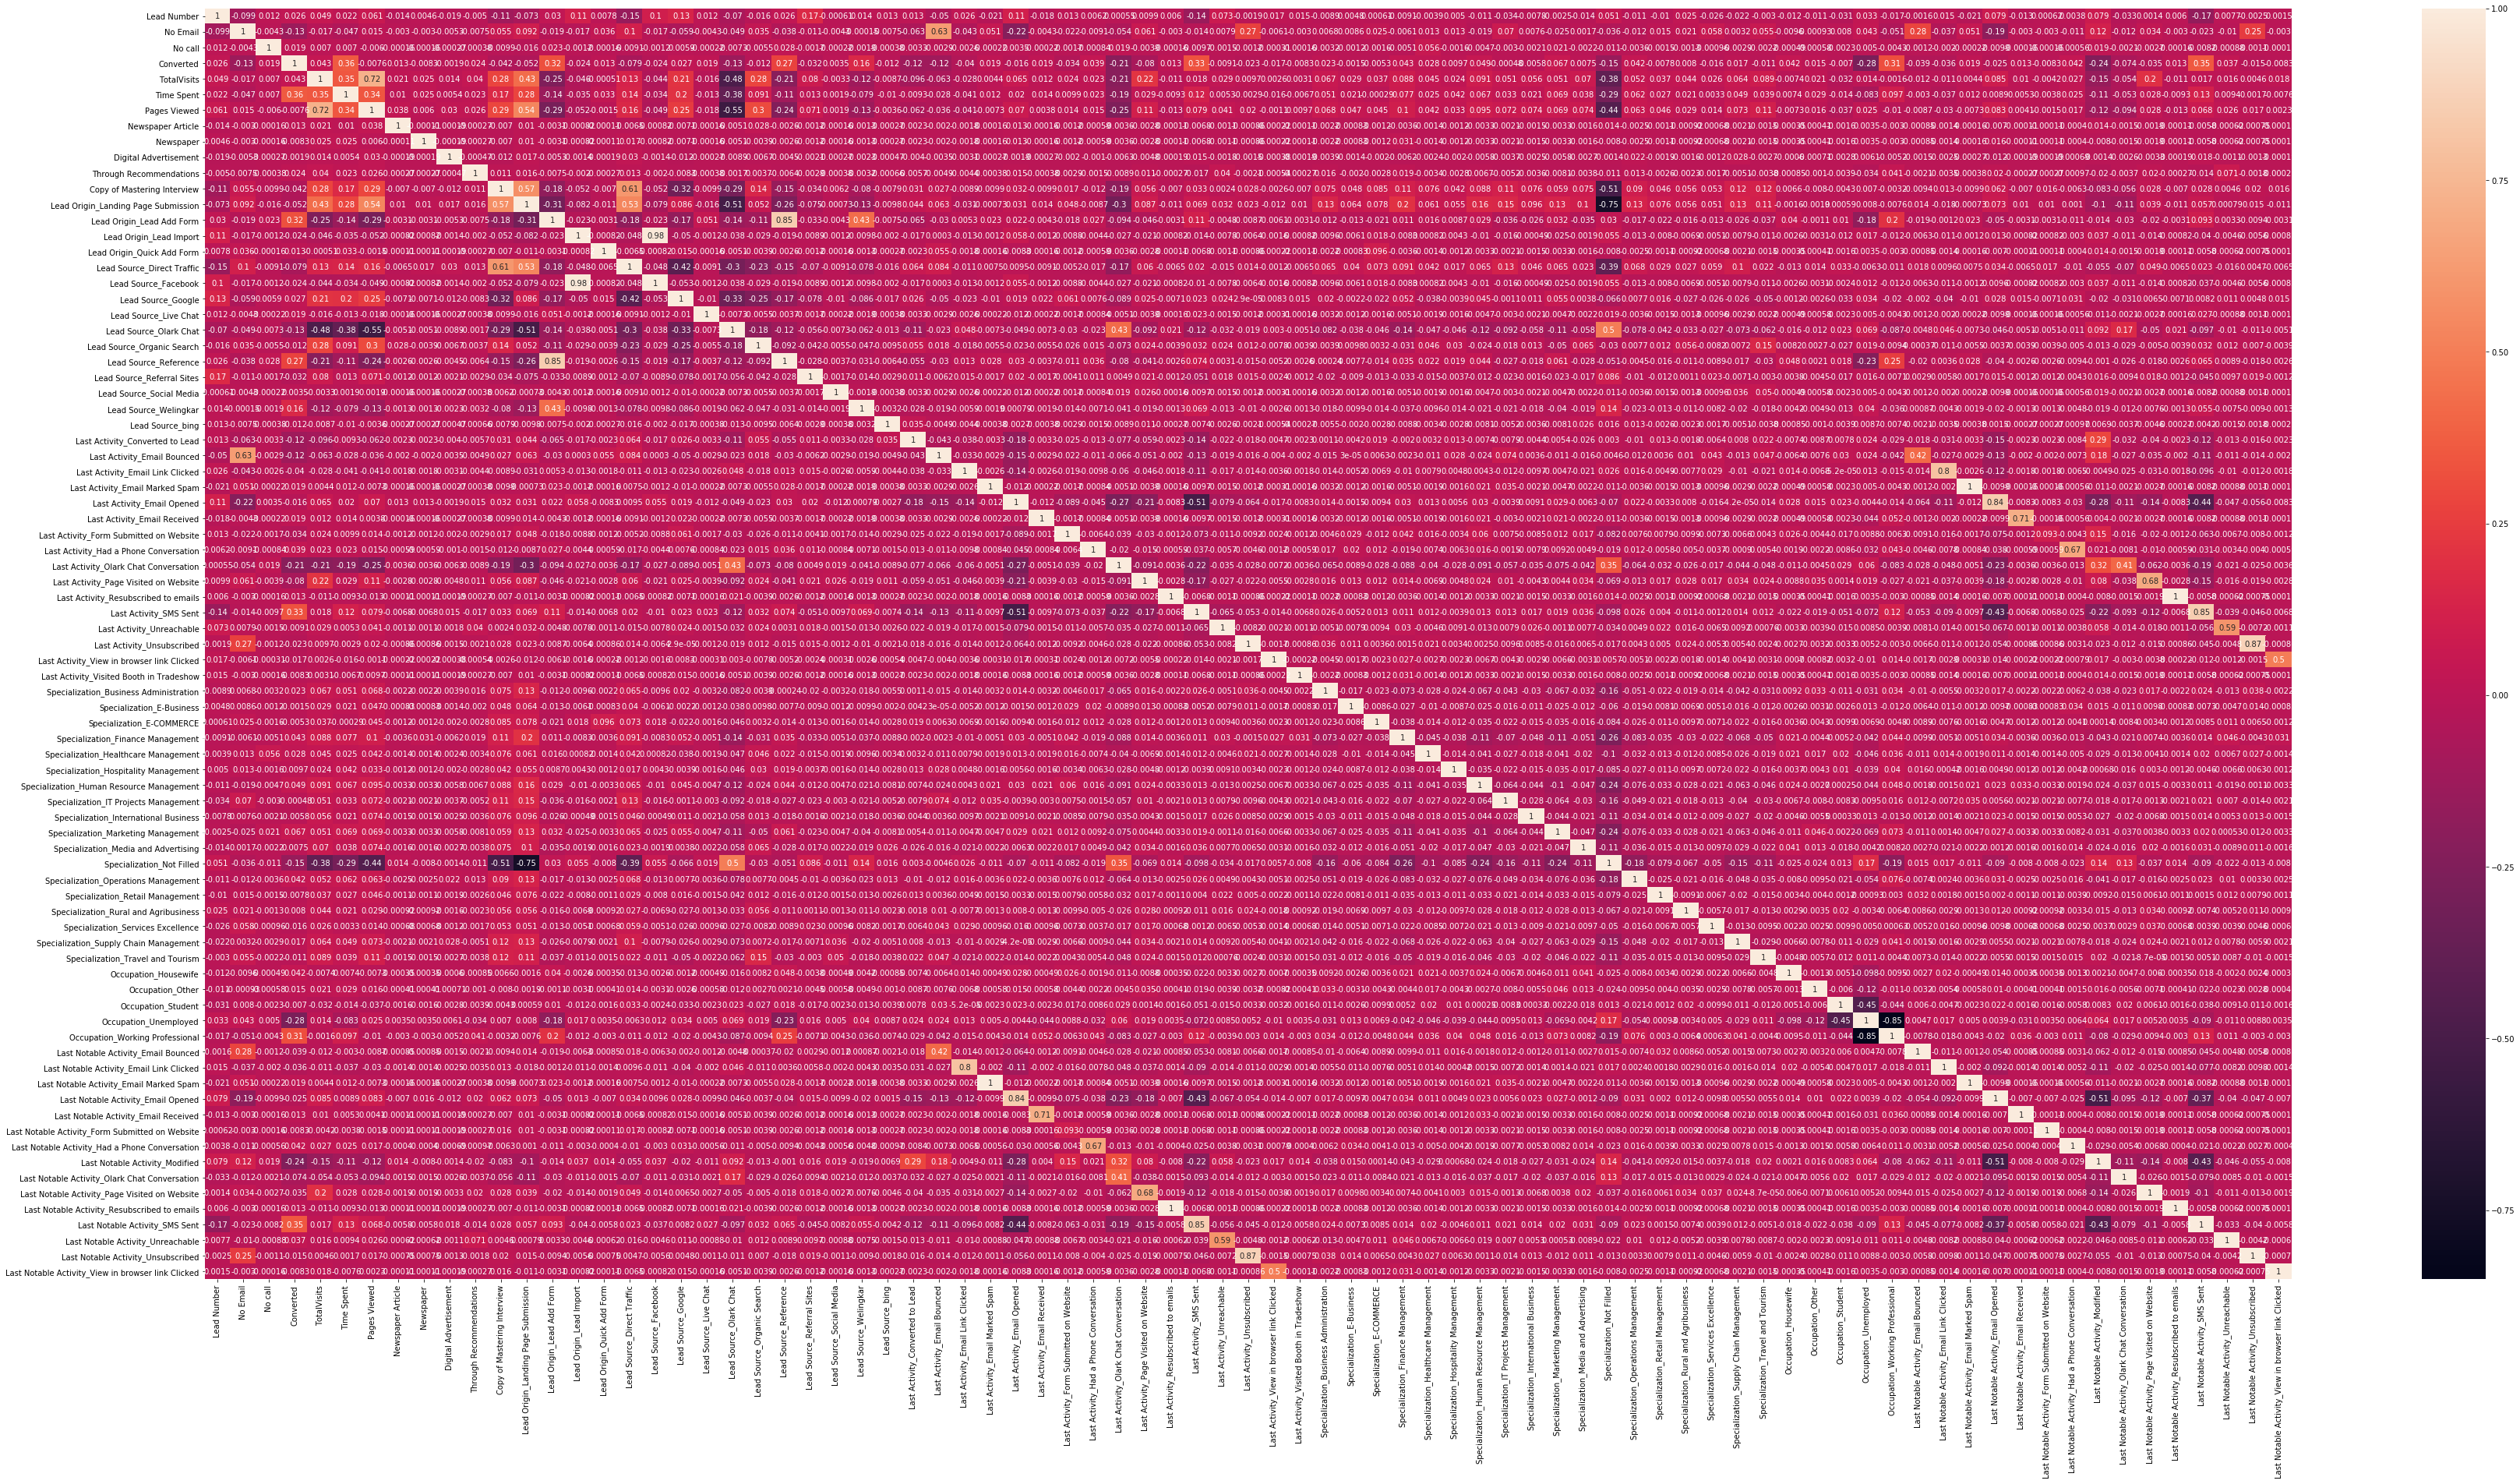

In [72]:
#Heat map to see the correlation of variables

plt.figure(figsize = (60,30))# Size of the figure

sns.heatmap(ls_df.corr(),annot = True)
plt.show()

- We can notice that the heat map it quite clustered and difficult to see the corealtion

## Model Building

In [73]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6286
Model Family:                Binomial   Df Model:                           76
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 13 Jul 2020   Deviance:                          nan
Time:                        17:48:57   Pearson chi2:                 7.18e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               1.572e+15   7.79e+07   2.02e+07      0.000    1.57e+15    1.57e+15
No Email                                           -8.984e+14   4.46e+06  -2.02e+08      0.000   -8.98e+14   -8.98e+14
No call                                             4.641e+15   4.77e+07   9.73e+07      0.000    4.64e+15    4.64e+15
TotalVisits                                         7.393e+13   1.31e+06   5.64e+07      0.000    7.39e+13    7.39e+13
Time Spent                                          3.466e+13   9.66e+05   3.59e+07      0.000    3.47e+13    3.47e+13
Pages Viewed                                       -5.356e+12   1.43e+06  -3.75e+06      0.000   -5.36e+12   -5.36e+12
Newspaper Article                                   4.372e+14   6.74e+07   6.49e+06      0.000    4.37e+14    4.37e+14
Newspaper                                          -4.269e+15   6.73e+07  -6.34e+07      0.000   -4.27e+15   -4.27e+15
Digital Advertisement                              -2.076e+14   3.89e+07  -5.33e+06      0.000   -2.08e+14   -2.08e+14
Through Recommendations                             3.827e+15   3.92e+07   9.75e+07      0.000    3.83e+15    3.83e+15
Copy of Mastering Interview                         7.207e+13   2.72e+06   2.65e+07      0.000    7.21e+13    7.21e+13
Lead Origin_Landing Page Submission                -1.449e+14   3.45e+06   -4.2e+07      0.000   -1.45e+14   -1.45e+14
Lead Origin_Lead Add Form                           1.365e+15   1.41e+07   9.65e+07      0.000    1.36e+15    1.36e+15
Lead Origin_Lead Import                             2.186e+15   6.84e+07   3.19e+07      0.000    2.19e+15    2.19e+15
Lead Origin_Quick Add Form                          5.278e+15   6.79e+07   7.77e+07      0.000    5.28e+15    5.28e+15
Lead Source_Direct Traffic                         -9.679e+14   2.42e+07  -3.99e+07      0.000   -9.68e+14   -9.68e+14
Lead Source_Facebook                                -3.16e+15   7.17e+07  -4.41e+07      0.000   -3.16e+15   -3.16e+15
Lead Source_Google                                 -8.327e+14   2.41e+07  -3.45e+07      0.000   -8.33e+14   -8.33e+14
Lead Source_Live Chat                               1.559e+15   5.42e+07   2.88e+07      0.000    1.56e+15    1.56e+15
Lead Source_Olark Chat                             -1.616e+14   2.44e+07  -6.62e+06      0.000   -1.62e+14   -1.62e+14
Lead Source_Organic Search                         -9.398e+14   2.43e+07  -3.87e+07      0.000    -9.4e+14    -9.4e+14
Lead Source_Reference                              -8.633e+14   2.64e+07  -3.27e+07      0.000   -8.63e+14   -8.63e+14
Lead Source_Referral Sites                          -8.63e+14   2.53e+07   -3.4e+07      0.000   -8.63e+14  

## Feature Selection Using RFE

In [74]:
logreg = LogisticRegression()

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [75]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False])

In [76]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('No Email', True, 1),
 ('No call', False, 13),
 ('TotalVisits', False, 38),
 ('Time Spent', True, 1),
 ('Pages Viewed', False, 39),
 ('Newspaper Article', False, 8),
 ('Newspaper', False, 10),
 ('Digital Advertisement', False, 58),
 ('Through Recommendations', False, 16),
 ('Copy of Mastering Interview', False, 45),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 48),
 ('Lead Origin_Quick Add Form', False, 40),
 ('Lead Source_Direct Traffic', False, 26),
 ('Lead Source_Facebook', False, 27),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Live Chat', False, 50),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Reference', False, 29),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Social Media', False, 12),
 ('Lead Source_Welingkar', True, 1),
 ('Lead Source_bing', False, 55),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Emai

In [77]:
col = X_train.columns[rfe.support_]
col

Index(['No Email', 'Time Spent', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingkar', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Specialization_Not Filled',
       'Occupation_Housewife', 'Occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [78]:
X_train.columns[~rfe.support_]

Index(['No call', 'TotalVisits', 'Pages Viewed', 'Newspaper Article',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Copy of Mastering Interview', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_bing', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in 

#### Assessing the model with StatsMomdels

#### Model 1

In [79]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2595.3
Date:                Mon, 13 Jul 2020   Deviance:                       5190.5
Time:                        17:49:05   Pearson chi2:                 7.10e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.4436      0.126     -3.511      0.000      -0.691      -0.196
No Email                                          -1.6387      0.177     -9.263      0.000      -1.985      -1.292
Time Spent                                         1.0674      0.040     26.600      0.000       0.989       1.146
Lead Origin_Landing Page Submission               -0.9924      0.130     -7.633      0.000      -1.247      -0.738
Lead Origin_Lead Add Form                          3.1736      0.212     14.972      0.000       2.758       3.589
Lead Source_Olark Chat                             0.9735      0.123      7.906      0.000       0.732       1.215
Lead Source_Welingkar                              3.4036      1.032      3.297      0.001       1.380       5.427
Last Activity_Converted to Lead                   -1.1003      0.208     -5.298      0.000      -1.507      -0.693
Last Activity_Olark Chat Conversation             -1.3690      0.163     -8.384      0.000      -1.689      -1.049
Specialization_Not Filled                         -1.0189      0.124     -8.202      0.000      -1.262      -0.775
Occupation_Housewife                              23.9859   2.26e+04      0.001      0.999   -4.43e+04    4.44e+04
Occupation_Working Professional                    2.6431      0.192     13.773      0.000       2.267       3.019
Last Notable Activity_Had a Phone Conversation    24.1805   2.34e+04      0.001      0.999   -4.58e+04    4.58e+04
Last Notable Activity_SMS Sent                     1.6415      0.081     20.330      0.000       1.483       1.800
Last Notable Activity_Unreachable                  1.8377      0.607      3.028      0.002       0.648       3.027
Last Notable Activity_Unsubscribed                 1.6889      0.489      3.453      0.001       0.730       2.647
==================================================================================================================
"""

In [80]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

294     0.127853
5988    0.044162
1011    0.184027
7533    0.155638
3190    0.761984
5648    0.089603
7250    0.057054
3625    0.107474
4111    0.746008
42      0.124727
dtype: float64

In [81]:
# Reshaping the values

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1278526 , 0.04416198, 0.18402672, 0.15563785, 0.76198417,
       0.08960328, 0.05705397, 0.10747413, 0.74600783, 0.12472688])

##### Creating a dataframe with the actual converted flag and the Converted probabilities

In [82]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = ls_df['Lead Number']
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.127853,660737
1,0,0.044162,660728
2,0,0.184027,660727
3,0,0.155638,660719
4,1,0.761984,660681


##### Creating new column 'Score' with 1 if Converted_Prob > 0.5 else 0

In [83]:
y_train_pred_final['Score'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Score
0,0,0.127853,660737,0
1,0,0.044162,660728,0
2,0,0.184027,660727,0
3,0,0.155638,660719,0
4,1,0.761984,660681,1


In [84]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Score )
print(confusion)

[[3474  461]
 [ 712 1716]]


In [85]:
# Predicted     not_churn    churn
# Actual
# not_churn        3474     461
# churn            712       1716  

In [86]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Score))

0.8156529938708157


#### Checking VIFs

In [87]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,2.04
8,Specialization_Not Filled,2.02
3,Lead Origin_Lead Add Form,1.52
7,Last Activity_Olark Chat Conversation,1.46
2,Lead Origin_Landing Page Submission,1.42
12,Last Notable Activity_SMS Sent,1.40
5,Lead Source_Welingkar,1.31
1,Time Spent,1.25
10,Occupation_Working Professional,1.20
0,No Email,1.18


#### Model 2

In [88]:
# dropping 'Last Notable Activity_Had a Phone Conversation' as it as p-value greater than 0.05

col = col.drop(['Last Notable Activity_Had a Phone Conversation'],1)

In [89]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.4
Date:                Mon, 13 Jul 2020   Deviance:                       5206.7
Time:                        17:49:06   Pearson chi2:                 7.11e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4245      0.126     -3.371      0.001      -0.671      -0.178
No Email                                 -1.6427      0.177     -9.294      0.000      -1.989      -1.296
Time Spent                                1.0654      0.040     26.612      0.000       0.987       1.144
Lead Origin_Landing Page Submission      -0.9999      0.130     -7.710      0.000      -1.254      -0.746
Lead Origin_Lead Add Form                 3.1628      0.212     14.929      0.000       2.748       3.578
Lead Source_Olark Chat                    0.9667      0.123      7.863      0.000       0.726       1.208
Lead Source_Welingkar                     3.4081      1.032      3.301      0.001       1.385       5.432
Last Activity_Converted to Lead          -1.1089      0.208     -5.343      0.000      -1.516      -0.702
Last Activity_Olark Chat Conversation    -1.3737      0.163     -8.414      0.000      -1.694      -1.054
Specialization_Not Filled                -1.0312      0.124     -8.315      0.000      -1.274      -0.788
Occupation_Housewife                     22.9738   1.37e+04      0.002      0.999   -2.69e+04    2.69e+04
Occupation_Working Professional           2.6346      0.192     13.730      0.000       2.259       3.011
Last Notable Activity_SMS Sent            1.6332      0.081     20.251      0.000       1.475       1.791
Last Notable Activity_Unreachable         1.8257      0.607      3.009      0.003       0.636       3.015
Last Notable Activity_Unsubscribed        1.6842      0.489      3.446      0.001       0.726       2.642
=========================================================================================================
"""

In [90]:
#Looking at the predicted values

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.12869316, 0.04405677, 0.18504024, 0.15559018, 0.76225277,
       0.09067995, 0.05688225, 0.10870442, 0.74631806, 0.12609307])

In [91]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [92]:
# Creating new column 'Score' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Score'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Score
0,0,0.128693,660737,0
1,0,0.044057,660728,0
2,0,0.185040,660727,0
3,0,0.155590,660719,0
4,1,0.762253,660681,1


In [93]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Score))

0.815024359578815


In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,2.04
8,Specialization_Not Filled,2.02
3,Lead Origin_Lead Add Form,1.52
7,Last Activity_Olark Chat Conversation,1.46
2,Lead Origin_Landing Page Submission,1.42
11,Last Notable Activity_SMS Sent,1.40
5,Lead Source_Welingkar,1.31
1,Time Spent,1.25
10,Occupation_Working Professional,1.20
0,No Email,1.18


#### Model 3

In [95]:
# dropping 'Last Notable Activity_Had a Phone Conversation' as it as p-value greater than 0.05
col = col.drop(['Occupation_Housewife'],1)

In [96]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.4
Date:                Mon, 13 Jul 2020   Deviance:                       5220.9
Time:                        17:49:06   Pearson chi2:                 7.14e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4156      0.126     -3.305      0.001      -0.662      -0.169
No Email                                 -1.6476      0.177     -9.325      0.000      -1.994      -1.301
Time Spent                                1.0647      0.040     26.627      0.000       0.986       1.143
Lead Origin_Landing Page Submission      -0.9982      0.129     -7.709      0.000      -1.252      -0.744
Lead Origin_Lead Add Form                 3.1738      0.212     14.999      0.000       2.759       3.588
Lead Source_Olark Chat                    0.9650      0.123      7.854      0.000       0.724       1.206
Lead Source_Welingkar                     3.3960      1.032      3.289      0.001       1.373       5.419
Last Activity_Converted to Lead          -1.1159      0.207     -5.378      0.000      -1.523      -0.709
Last Activity_Olark Chat Conversation    -1.3771      0.163     -8.435      0.000      -1.697      -1.057
Specialization_Not Filled                -1.0374      0.124     -8.376      0.000      -1.280      -0.795
Occupation_Working Professional           2.6272      0.192     13.692      0.000       2.251       3.003
Last Notable Activity_SMS Sent            1.6257      0.081     20.175      0.000       1.468       1.784
Last Notable Activity_Unreachable         1.8166      0.607      2.994      0.003       0.627       3.006
Last Notable Activity_Unsubscribed        1.6806      0.489      3.438      0.001       0.723       2.639
=========================================================================================================
"""

In [97]:
#Looking at the predicted values

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.12903747, 0.0439258 , 0.18545477, 0.15538585, 0.76269235,
       0.09161432, 0.05679487, 0.10978741, 0.74678944, 0.12731063])

In [98]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [99]:
# Creating new column 'Score' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Score'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Score
0,0,0.129037,660737,0
1,0,0.043926,660728,0
2,0,0.185455,660727,0
3,0,0.155386,660719,0
4,1,0.762692,660681,1


In [100]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Score))

0.8143957252868144


In [101]:
#Checking the ViF

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,2.04
8,Specialization_Not Filled,2.02
3,Lead Origin_Lead Add Form,1.51
7,Last Activity_Olark Chat Conversation,1.46
2,Lead Origin_Landing Page Submission,1.42
10,Last Notable Activity_SMS Sent,1.40
5,Lead Source_Welingkar,1.31
1,Time Spent,1.25
9,Occupation_Working Professional,1.20
0,No Email,1.18


- We arrive at a model which VIF's below 5 and p-values less than 0.05

## Sensitivity and Specificity

In [102]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negative

In [103]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7067545304777595

In [104]:
# Let us calculate specificity

TN / float(TN+FP)

0.8828462515883101

In [105]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.11715374841168996


In [106]:
# positive predictive value 

print (TP / float(TP+FP))

0.7882406982085439


In [107]:
# Negative predictive value

print (TN / float(TN+ FN))

0.829909221213569


## Plotting the ROC Curve

In [108]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

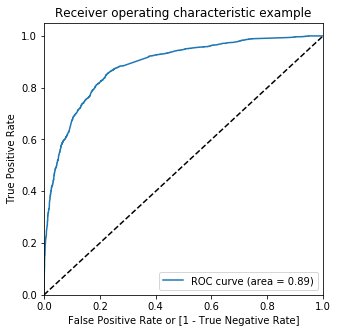

In [110]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Finding Optimal Cutoff Point

In [111]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.129037,660737,0,1,1,0,0,0,0,0,0,0,0
1,0,0.043926,660728,0,1,0,0,0,0,0,0,0,0,0
2,0,0.185455,660727,0,1,1,0,0,0,0,0,0,0,0
3,0,0.155386,660719,0,1,1,0,0,0,0,0,0,0,0
4,1,0.762692,660681,1,1,1,1,1,1,1,1,1,0,0


In [112]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.592959  0.971170  0.359593
0.2   0.2  0.783750  0.884267  0.721728
0.3   0.3  0.804495  0.848847  0.777128
0.4   0.4  0.812667  0.782537  0.831258
0.5   0.5  0.814396  0.703460  0.882846
0.6   0.6  0.801980  0.598435  0.927573
0.7   0.7  0.784693  0.512768  0.952478
0.8   0.8  0.761590  0.423806  0.970013
0.9   0.9  0.719315  0.284596  0.987548


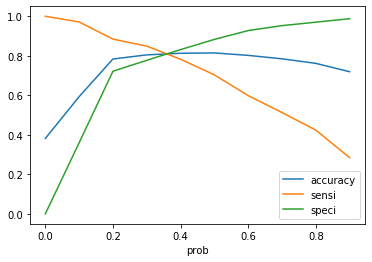

In [113]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [114]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.129037,660737,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.043926,660728,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.185455,660727,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.155386,660719,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.762692,660681,1,1,1,1,1,1,1,1,1,0,0,1


In [115]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8044947351878045

In [116]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3058,  877],
       [ 367, 2061]], dtype=int64)

## Precision and Recall

In [117]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7014976174268209

In [118]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8488467874794069

## Making predictions on the test set

In [119]:
X_test[['TotalVisits','Time Spent','Pages Viewed']] = scaler.transform(X_test[['TotalVisits','Time Spent','Pages Viewed']])

In [120]:
X_test = X_test[col]
X_test.head()

,No Email,Time Spent,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingkar,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Specialization_Not Filled,Occupation_Working Professional,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
6796,0,1.919395,1,0,0,0,0,0,0,0,1,0,0
1839,0,-0.546142,1,0,0,0,0,0,1,0,0,0,0
753,0,-0.797465,0,0,0,0,0,0,1,0,0,0,0
4432,0,-0.623190,1,0,0,0,0,0,0,0,0,0,0
8911,0,2.392690,1,0,0,0,0,0,0,0,0,0,0


In [121]:
X_test_sm = sm.add_constant(X_test)

In [122]:
y_test_pred = res.predict(X_test_sm)

In [123]:
y_test_pred[:10]

6796    0.905112
1839    0.045970
753     0.090952
4432    0.111324
8911    0.756497
4862    0.455879
2267    0.161696
1012    0.085456
8883    0.093584
6896    0.916670
dtype: float64

In [124]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
6796,0.905112
1839,0.045970
753,0.090952
4432,0.111324
8911,0.756497


In [125]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [126]:
# Putting CustID to index
y_test_df['Lead Number'] = ls_df['Lead Number']

In [127]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [128]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,1,596625,0.905112
1,0,641392,0.045970
2,0,652477,0.090952
3,0,616581,0.111324
4,1,580888,0.756497


In [129]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [130]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

AttributeError: 'DataFrame' object has no attribute 'reindex_axis'

In [ ]:
y_pred_final['Score'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Score)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Score )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

## Applying it to the entire dataset

In [ ]:
ls_df.head()

In [ ]:
# Storing the feature variables

lead_score_X = ls_df.drop(['Converted','Lead Number'], axis=1)

lead_score_X.head()

In [ ]:
# Storing the target variable

lead_score_y = ls_df['Converted']
lead_score_y.head()

In [ ]:
# perforimg just the trasnform on the data set

lead_score_X[['TotalVisits','Time Spent','Pages Viewed']] = scaler.transform(lead_score_X[['TotalVisits','Time Spent','Pages Viewed']])

In [ ]:
lead_score_X = lead_score_X[col]
lead_score_X.head()

In [ ]:
# Adding the constant
X_score_sm = sm.add_constant(lead_score_X)

In [ ]:
# Looking at the predicted values

y_score_pred = res.predict(X_score_sm)

In [ ]:
y_score_pred[:10]

In [ ]:
y_pred_1 = pd.DataFrame(y_score_pred)
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_valid_df = pd.DataFrame(lead_score_y)

In [ ]:
# Putting lead numbers to index

y_valid_df['Lead Number'] = ls_df['Lead Number']

In [ ]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_valid_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_valid_df and y_pred_1

y_pred_final = pd.concat([y_valid_df, y_pred_1],axis=1)
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

In [ ]:
#Applying the cut off of 0.3

y_pred_final['Score'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Score)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Score )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
y_pred_final.head()

In [ ]:
# Filtering the data above 0.8
greater_ = y_pred_final['Converted_Prob'] >= 0.8
greater_.head()

In [ ]:
# Fianl data frame with all the potential leads
final_data = y_pred_final[greater_]
final_data.head(10)

In [ ]:
final_data['Percentage_Converted'] = round(100*final_data['Converted_Prob'],2)
final_data.head()

In [ ]:
final_data = final_data[['Lead Number','Percentage_Converted']].reset_index(drop = True)
final_data.head()

- We have a final data set with all the unique lead number to whom should we target and have proability of 80% to become a paying customer